### Create a transfer function ($T_x$) from Ocean-Earth layered conductivity model.
---
* __author__ = Chakraborty, S.
* __copyright__ = 
* __credits__ = []
* __license__ = MIT
* __version__ = 1.0
* __maintainer__ = Chakraborty, S.
* __email__ = shibaji7@vt.edu
* __status__ = Research

In [1]:
# Import all required
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from types import SimpleNamespace
plt.style.use(["science", "ieee"])
from gic.model.oml import OceanModel
from gic.model.cables import Cable, TheoriticalSolver
from gic.model.utils import RecursiveNamespace, frexp102str
from gic.validation.simulate_synB_synT import SytheticCableAnalysis

from scipy.stats import pearsonr
%matplotlib inline

In [2]:
# Generate synthetic Ocean-Earth Model
thikness = np.array([4,2,10,140,254,250,340])*1e3 # Thicknesses of the Ocan [index 0] the Earth layers
resistivity = np.array([0.3,3,3000,1000,100,10,1]) # Resitivities of each layer
om = OceanModel(thikness, resistivity, flim=[1e-6,1e-2]) # Create ocean-earth leayerd model
Tx = om.get_TFs() # Get transfer function

2022-09-06 12:10:35.853 | INFO     | gic.model.oml:__init__:46 - Compile OM[] to calc O(floor) E- and B-Fields


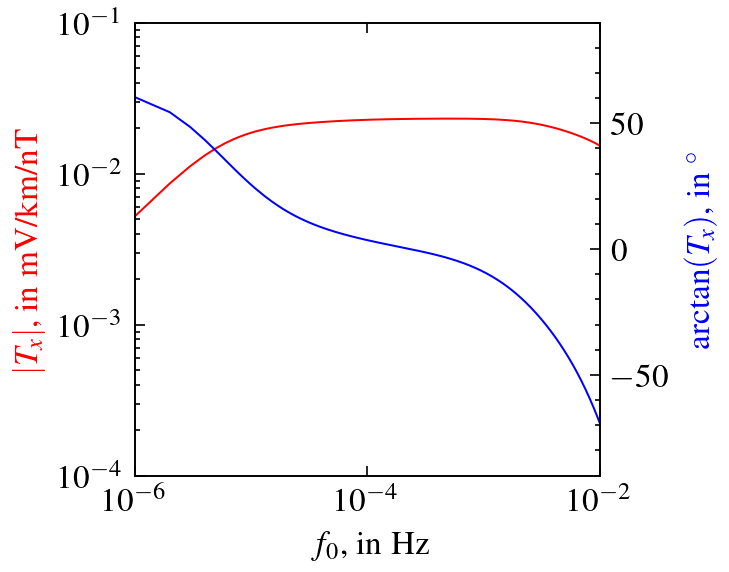

In [3]:
# Plot transfer function (amplitude and phase)
fig = plt.figure(dpi=240, figsize=(2.5,2.5))
ax = fig.add_subplot(111)
ax.loglog(Tx.freq, np.abs(Tx.E2B), "r", lw=0.6, ls="-")
ax.set_xlabel(r"$f_0$, in Hz")
ax.set_ylabel(r"$|T_x|$, in mV/km/nT", color="r")
ax.set_xlim(1e-6,1e-2)
ax.set_ylim(1e-4,1e-1)
ax = ax.twinx()
ax.semilogx(Tx.freq, np.angle(Tx.E2B, deg=True), "b", lw=0.6, ls="-")
ax.set_ylabel(r"$\arctan(T_x)$, in $^\circ$", color="b")
ax.set_ylim(-90, 90)
_ = ax.set_xlim(1e-6,1e-2)